In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ORRFA import *
import interpretableai
from interpretableai import iai
import pandas as pd
import json
from HR import *

In [2]:
dataset = pd.read_csv("/Users/ryanlucas/Desktop/kc_house_data.csv")

In [3]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
train_idx = np.arange(0, int(0.7*len(dataset)))
test_idx = np.arange(int(0.7*len(dataset)), int(1*len(dataset)))

features = dataset.loc[train_idx, ["floors", "bedrooms",
    "bathrooms",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "sqft_living",
    "sqft_lot",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15"]]

diagnosis = dataset.loc[train_idx, "price"]
orig_columns = features.copy().columns
orig_features_size = features.copy().shape[1]

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = pd.DataFrame(sc.fit_transform(features))
features.columns = orig_columns

In [6]:
features_test = dataset.loc[test_idx, ["floors", "bedrooms",
    "bathrooms",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "sqft_living",
    "sqft_lot",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15"]]
diagnosis_test = dataset.loc[test_idx, 'price']

In [7]:
features_test = pd.DataFrame(sc.fit_transform(features_test))
features_test.columns = orig_columns

In [8]:
diagnosis

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
15124    555700.0
15125    690000.0
15126    449000.0
15127    308500.0
15128    340000.0
Name: price, Length: 15129, dtype: float64

In [9]:
print(len(dataset))
print(len(features))
print(len(features_test))

21613
15129
6484


In [10]:
features

,floors,bedrooms,bathrooms,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living,sqft_lot,lat,long,sqft_living15,sqft_lot15
0,-0.847801,-0.396310,-1.396445,-0.703175,-0.674634,-0.436232,-0.217431,-0.961356,-0.239098,-0.348602,-0.301875,-0.940320,-0.278087
1,1.113119,-0.396310,0.251615,0.524394,0.213892,-0.579063,4.587486,0.573193,-0.201860,1.152626,-0.747374,-0.420453,-0.206627
2,-0.847801,-1.496047,-1.396445,-1.211562,-0.674634,-1.221803,-0.217431,-1.413993,-0.137349,1.273554,-0.129424,1.109440,-0.191429
3,-0.847801,0.703428,1.240451,-0.864371,1.346762,-0.079155,-0.217431,-0.100242,-0.254302,-0.279909,-1.279099,-0.910614,-0.301440
4,-0.847801,-0.396310,-0.077997,-0.083190,-0.674634,0.706416,-0.217431,-0.409360,-0.182259,0.407021,1.221446,-0.257067,-0.211513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,-0.847801,-0.396310,-0.077997,0.078006,-0.674634,-0.364817,-0.217431,-0.265841,-0.080744,0.206666,0.632237,0.381627,-0.038090
15125,1.113119,0.703428,0.581227,1.826362,-0.674634,0.849247,-0.217431,1.290787,0.456770,1.393767,0.725648,1.599600,0.785444
15126,-0.847801,-0.396310,-0.407609,-0.107990,-0.674634,-0.543356,-0.217431,-0.431440,-0.144436,1.405931,-0.510254,0.129120,0.259894
15127,-0.847801,-1.496047,-1.396445,-1.112364,-0.674634,-0.614771,-0.217431,-1.325673,-0.226841,1.254234,-0.812044,-1.296800,-0.259261


In [11]:
np.random.seed(1)
rules = {}

# for j in range(2, 7):

for j in [5]:

    for i in range(1,51):

        n = max(5, j+1)

        #################
        sampled_features = features.copy().sample(n=int(n),axis='columns')

        OCT_H = iai.GridSearch(
                  iai.OptimalTreeRegressor(
                      max_depth = j, cp = 0.00000000001))

        OCT_H.fit(sampled_features, diagnosis)
        OCT_H.write_json(f"tre.json")

        ######################
        f = open(f"tre.json")
        data = json.load(f)

        paths = gen_paths(data)

        sub_paths = gen_subpaths(paths)

        names = sampled_features.columns

        # PASS IN PATHS HERE
        rule_features_new = gen_features(
                    sub_paths, data, sampled_features, names)

        rules[f"tre_{i}_{j}"] = rule_features_new

        print(f"Tree: {i}")


[ Warning: This copy of Interpretable AI software is for academic purposes only and not for commercial use.


Tree: 1
Tree: 2
Tree: 3
Tree: 4
Tree: 5
Tree: 6
Tree: 7
Tree: 8
Tree: 9
Tree: 10
Tree: 11
Tree: 12
Tree: 13
Tree: 14
Tree: 15
Tree: 16
Tree: 17
Tree: 18
Tree: 19
Tree: 20
Tree: 21
Tree: 22
Tree: 23
Tree: 24
Tree: 1
Tree: 2
Tree: 3
Tree: 4
Tree: 5
Tree: 6
Tree: 7
Tree: 8
Tree: 9
Tree: 10
Tree: 11
Tree: 12
Tree: 13
Tree: 14
Tree: 15
Tree: 16
Tree: 17
Tree: 18
Tree: 19
Tree: 20
Tree: 21
Tree: 22
Tree: 23
Tree: 24
Tree: 1
Tree: 2
Tree: 3
Tree: 4
Tree: 5
Tree: 6
Tree: 7
Tree: 8
Tree: 9
Tree: 10
Tree: 11
Tree: 12
Tree: 13
Tree: 14
Tree: 15
Tree: 16
Tree: 17
Tree: 18
Tree: 19
Tree: 20
Tree: 21
Tree: 22
Tree: 23
Tree: 24
Tree: 1
Tree: 2
Tree: 3
Tree: 4
Tree: 5
Tree: 6
Tree: 7
Tree: 8
Tree: 9
Tree: 10
Tree: 11
Tree: 12
Tree: 13
Tree: 14
Tree: 15
Tree: 16
Tree: 17
Tree: 18
Tree: 19
Tree: 20
Tree: 21
Tree: 22
Tree: 23
Tree: 24
Tree: 1
Tree: 2
Tree: 3
Tree: 4
Tree: 5
Tree: 6
Tree: 7
Tree: 8
Tree: 9
Tree: 10
Tree: 11
Tree: 12
Tree: 13
Tree: 14
Tree: 15
Tree: 16
Tree: 17
Tree: 18
Tree: 19
Tree: 20
T

In [12]:
features.columns

Index(['floors', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
big_df = pd.DataFrame()
for tree in rules.keys():

    big_df = pd.concat([big_df, rules[tree]],axis =1)


In [14]:
df = big_df.loc[:,~big_df.columns.duplicated()].copy()

In [15]:
for column in df.columns:
    if df[column].sum() == len(df):
        del df[column]


In [16]:
df

,(features['sqft_above'] < 0.38179799651399304) & (0 >= 0.0),(features['long'] >= 0.19392279361690967) & (0 >= 0.0),(features['sqft_living'] < 0.4263616928945242) & (0 >= 0.0),(features['sqft_living'] >= 6.501629211500662) & (0 >= 0.0),(features['sqft_living15'] < 0.9349136268178331) & (0 >= 0.0),(features['sqft_above'] >= 5.416070967285557) & (0 >= 0.0),(features['lat'] < -0.1908226634707515) & (0 >= 0.0),(features['bathrooms'] >= 4.371765747967869) & (0 >= 0.0),(features['sqft_lot'] < -0.0805570046761353) & (0 >= 0.0),(features['sqft_lot'] >= -0.07203116344222432) & (0 >= 0.0),...,(features['long'] >= -0.08990344568730979) & (features['sqft_living'] < 7.406902583344573) & (0 >= 0.0),(features['lat'] < -0.18867600827318176) & (features['sqft_living15'] < 0.058566712808693744) & (0 >= 0.0),(features['sqft_living'] >= 4.586203235708977) & (features['sqft_lot'] >= 0.7163693979575069) & (0 >= 0.0),(features['sqft_above'] >= 5.471869559326128) & (features['long'] >= 0.37355965393600865) & (0 >= 0.0),(features['long'] >= -0.535402859278733) & (features['sqft_above'] < 8.032404949632356) & (0 >= 0.0),(features['lat'] >= -0.35361068262017703) & (features['sqft_above'] < 4.2629000651137465) & (0 >= 0.0),(features['sqft_living'] >= 2.753576653683501) & (features['yr_renovated'] < 4.551286382349196) & (0 >= 0.0),(features['sqft_living'] >= 4.531003639864835) & (features['sqft_lot'] >= 0.8077444289047583) & (0 >= 0.0),(features['sqft_basement'] >= -0.2859038698926942) & (features['sqft_living15'] < 2.5910607609198495) & (0 >= 0.0),(features['long'] >= 0.19751553082325835) & (features['sqft_living'] >= 4.531003639864835) & (0 >= 0.0)
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,1,1,1,0,1,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,1,1,1,0,1,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
15125,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
15126,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
15127,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
features_for_robust_reg = df

In [18]:
rule_features = features_for_robust_reg.copy()
features_for_robust_reg = pd.concat([features, features_for_robust_reg], axis = 1)

In [19]:
features_for_robust_reg.sum()

floors                                                                                                               -1.247003e-12
bedrooms                                                                                                              1.946887e-12
bathrooms                                                                                                            -2.444267e-12
sqft_above                                                                                                           -5.542233e-13
sqft_basement                                                                                                        -6.217249e-13
                                                                                                                          ...     
(features['lat'] >= -0.35361068262017703) & (features['sqft_above'] < 4.2629000651137465) & (0 >= 0.0)                1.006400e+04
(features['sqft_living'] >= 2.753576653683501) & (features['yr_renovated'] < 4.5512

In [20]:
features_for_robust_reg.insert(loc = 0, column = 'Intercept', value = [1 for i in range(len(features_for_robust_reg))])

In [21]:
features_for_robust_reg

,Intercept,floors,bedrooms,bathrooms,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living,sqft_lot,...,(features['long'] >= -0.08990344568730979) & (features['sqft_living'] < 7.406902583344573) & (0 >= 0.0),(features['lat'] < -0.18867600827318176) & (features['sqft_living15'] < 0.058566712808693744) & (0 >= 0.0),(features['sqft_living'] >= 4.586203235708977) & (features['sqft_lot'] >= 0.7163693979575069) & (0 >= 0.0),(features['sqft_above'] >= 5.471869559326128) & (features['long'] >= 0.37355965393600865) & (0 >= 0.0),(features['long'] >= -0.535402859278733) & (features['sqft_above'] < 8.032404949632356) & (0 >= 0.0),(features['lat'] >= -0.35361068262017703) & (features['sqft_above'] < 4.2629000651137465) & (0 >= 0.0),(features['sqft_living'] >= 2.753576653683501) & (features['yr_renovated'] < 4.551286382349196) & (0 >= 0.0),(features['sqft_living'] >= 4.531003639864835) & (features['sqft_lot'] >= 0.8077444289047583) & (0 >= 0.0),(features['sqft_basement'] >= -0.2859038698926942) & (features['sqft_living15'] < 2.5910607609198495) & (0 >= 0.0),(features['long'] >= 0.19751553082325835) & (features['sqft_living'] >= 4.531003639864835) & (0 >= 0.0)
0,1,-0.847801,-0.396310,-1.396445,-0.703175,-0.674634,-0.436232,-0.217431,-0.961356,-0.239098,...,0,1,0,0,1,1,0,0,0,0
1,1,1.113119,-0.396310,0.251615,0.524394,0.213892,-0.579063,4.587486,0.573193,-0.201860,...,0,0,0,0,0,1,0,0,1,0
2,1,-0.847801,-1.496047,-1.396445,-1.211562,-0.674634,-1.221803,-0.217431,-1.413993,-0.137349,...,0,0,0,0,1,1,0,0,0,0
3,1,-0.847801,0.703428,1.240451,-0.864371,1.346762,-0.079155,-0.217431,-0.100242,-0.254302,...,0,1,0,0,0,1,0,0,1,0
4,1,-0.847801,-0.396310,-0.077997,-0.083190,-0.674634,0.706416,-0.217431,-0.409360,-0.182259,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,1,-0.847801,-0.396310,-0.077997,0.078006,-0.674634,-0.364817,-0.217431,-0.265841,-0.080744,...,1,0,0,0,1,1,0,0,0,0
15125,1,1.113119,0.703428,0.581227,1.826362,-0.674634,0.849247,-0.217431,1.290787,0.456770,...,1,0,0,0,1,1,0,0,0,0
15126,1,-0.847801,-0.396310,-0.407609,-0.107990,-0.674634,-0.543356,-0.217431,-0.431440,-0.144436,...,0,0,0,0,1,1,0,0,0,0
15127,1,-0.847801,-1.496047,-1.396445,-1.112364,-0.674634,-0.614771,-0.217431,-1.325673,-0.226841,...,0,0,0,0,0,1,0,0,0,0


In [22]:
features_for_robust_reg

,Intercept,floors,bedrooms,bathrooms,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living,sqft_lot,...,(features['long'] >= -0.08990344568730979) & (features['sqft_living'] < 7.406902583344573) & (0 >= 0.0),(features['lat'] < -0.18867600827318176) & (features['sqft_living15'] < 0.058566712808693744) & (0 >= 0.0),(features['sqft_living'] >= 4.586203235708977) & (features['sqft_lot'] >= 0.7163693979575069) & (0 >= 0.0),(features['sqft_above'] >= 5.471869559326128) & (features['long'] >= 0.37355965393600865) & (0 >= 0.0),(features['long'] >= -0.535402859278733) & (features['sqft_above'] < 8.032404949632356) & (0 >= 0.0),(features['lat'] >= -0.35361068262017703) & (features['sqft_above'] < 4.2629000651137465) & (0 >= 0.0),(features['sqft_living'] >= 2.753576653683501) & (features['yr_renovated'] < 4.551286382349196) & (0 >= 0.0),(features['sqft_living'] >= 4.531003639864835) & (features['sqft_lot'] >= 0.8077444289047583) & (0 >= 0.0),(features['sqft_basement'] >= -0.2859038698926942) & (features['sqft_living15'] < 2.5910607609198495) & (0 >= 0.0),(features['long'] >= 0.19751553082325835) & (features['sqft_living'] >= 4.531003639864835) & (0 >= 0.0)
0,1,-0.847801,-0.396310,-1.396445,-0.703175,-0.674634,-0.436232,-0.217431,-0.961356,-0.239098,...,0,1,0,0,1,1,0,0,0,0
1,1,1.113119,-0.396310,0.251615,0.524394,0.213892,-0.579063,4.587486,0.573193,-0.201860,...,0,0,0,0,0,1,0,0,1,0
2,1,-0.847801,-1.496047,-1.396445,-1.211562,-0.674634,-1.221803,-0.217431,-1.413993,-0.137349,...,0,0,0,0,1,1,0,0,0,0
3,1,-0.847801,0.703428,1.240451,-0.864371,1.346762,-0.079155,-0.217431,-0.100242,-0.254302,...,0,1,0,0,0,1,0,0,1,0
4,1,-0.847801,-0.396310,-0.077997,-0.083190,-0.674634,0.706416,-0.217431,-0.409360,-0.182259,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,1,-0.847801,-0.396310,-0.077997,0.078006,-0.674634,-0.364817,-0.217431,-0.265841,-0.080744,...,1,0,0,0,1,1,0,0,0,0
15125,1,1.113119,0.703428,0.581227,1.826362,-0.674634,0.849247,-0.217431,1.290787,0.456770,...,1,0,0,0,1,1,0,0,0,0
15126,1,-0.847801,-0.396310,-0.407609,-0.107990,-0.674634,-0.543356,-0.217431,-0.431440,-0.144436,...,0,0,0,0,1,1,0,0,0,0
15127,1,-0.847801,-1.496047,-1.396445,-1.112364,-0.674634,-0.614771,-0.217431,-1.325673,-0.226841,...,0,0,0,0,0,1,0,0,0,0


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
features.insert(loc = 0, column = 'Intercept', value = [1 for i in range(len(features))])

In [25]:
reg_baseline = LinearRegression().fit(features.copy()
, diagnosis)

In [26]:
θ_baseline = reg_baseline.coef_

In [27]:
predictions_baseline = reg_baseline.predict(features.copy())

In [28]:
(diagnosis - predictions_baseline).describe()

count    1.512900e+04
mean     3.840520e+01
std      2.241736e+05
min     -1.398452e+06
25%     -1.142493e+05
50%     -1.149486e+04
75%      8.758711e+04
max      4.114233e+06
Name: price, dtype: float64

In [29]:
SSE_model = sum((diagnosis - predictions_baseline)**2)
SSE_mean = sum((diagnosis - diagnosis.mean())**2)

1 - SSE_model/SSE_mean

0.6257134200057799

In [30]:
features_test.insert(loc = 0, column = 'Intercept', value = [1 for i in range(len(features_test))])

In [31]:
predictions_test_baseline = reg_baseline.predict(features_test)

In [32]:
SSE_model = sum((diagnosis_test - predictions_test_baseline)**2)
SSE_mean = sum((diagnosis_test - diagnosis.mean())**2)

1 - SSE_model/SSE_mean

-1.256205050439164e+23

In [33]:
reg_trees = LinearRegression().fit(features.copy()
, diagnosis)

In [34]:
from sklearn import linear_model

In [35]:
lasso_trees = linear_model.Ridge(alpha = 1).fit(features_for_robust_reg.copy()
, diagnosis)

In [36]:
predictions_lasso_trees = lasso_trees.predict(features_for_robust_reg)

In [37]:
SSE_model = sum((predictions_lasso_trees - diagnosis)**2)
SSE_mean = sum((diagnosis - diagnosis.mean())**2)

1 - SSE_model/SSE_mean

0.7715354236895087

In [38]:
features = features_test
for rule in rule_features.columns:

    index_feature = list(features.loc[eval(rule)].index)

    print(index_feature)
    new_feature = [1 if i in index_feature else 0 for i in range(features.index[0], features.index[-1]+1)]

    features[rule] = new_feature




[0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 38, 39, 41, 43, 45, 46, 47, 50, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 98, 99, 102, 103, 104, 106, 107, 109, 110, 113, 114, 115, 118, 119, 120, 121, 122, 123, 127, 128, 130, 132, 136, 137, 138, 139, 140, 141, 143, 144, 146, 147, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 177, 178, 179, 180, 181, 182, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 222, 224, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 261, 263, 264, 266, 267, 269, 270, 271, 272, 273, 274, 277, 278, 279, 280, 281, 282

In [39]:
new_features = features_test

In [40]:
new_features.insert(loc = 0, column = 'Intercept', value = [1 for i in range(len(new_features))])

ValueError: cannot insert Intercept, already exists

In [41]:
predictions_test = lasso_trees.predict(features_test)

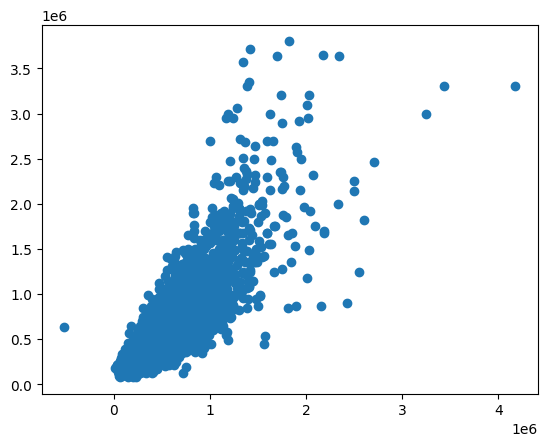

In [42]:
plt.scatter(predictions_test, diagnosis_test)

In [44]:
SSE_model = sum((diagnosis_test - predictions_test)**2)
SSE_mean = sum((diagnosis_test - diagnosis.mean())**2)

1 - SSE_model/SSE_mean

0.6890645892541503